In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression                                       #linear regression
from sklearn.preprocessing import PolynomialFeatures                                    #polynomial regression
from sklearn.svm import SVR                                                             #simple vector regression
from sklearn.tree import DecisionTreeRegressor                                          #decision tree regressor
from sklearn.ensemble import RandomForestRegressor                                      #random forest regressor
import gurobipy as gp
import torch
from torch import nn

In [2]:
dataset = pd.read_csv('input/adatb_setcover_output.csv')

In [3]:
dataset.head(10)

,policy,seed,type,instance,nnodes,nlps,stime,gap,status,ndomchgs,ncutoffs,walltime,proctime,objval
0,internal:relpscost,0,small,/data/IP-DL/instances/becsogergely/adatb/setco...,1,2,0.03,0.0,optimal,0,0,0.041468,0.041470,28.0
1,internal:relpscost,0,small,/data/IP-DL/instances/becsogergely/adatb/setco...,1,8,0.12,0.0,optimal,0,0,0.117496,0.117499,25.0
2,internal:relpscost,0,small,/data/IP-DL/instances/becsogergely/adatb/setco...,1,3,0.03,0.0,optimal,0,0,0.032750,0.032753,10.0
3,internal:relpscost,0,small,/data/IP-DL/instances/becsogergely/adatb/setco...,1,2,0.05,0.0,optimal,0,0,0.046181,0.046185,23.0
4,internal:relpscost,0,small,/data/IP-DL/instances/becsogergely/adatb/setco...,1,1,0.01,0.0,optimal,0,0,0.014738,0.014741,11.0
5,internal:relpscost,0,small,/data/IP-DL/instances/becsogergely/adatb/setco...,1,26,0.24,0.0,optimal,0,0,0.250231,0.250223,17.0
6,internal:relpscost,0,small,/data/IP-DL/instances/becsogergely/adatb/setco...,1,30,0.33,0.0,optimal,0,1,0.331593,0.331595,19.0
7,internal:relpscost,0,small,/data/IP-DL/instances/becsogergely/adatb/setco...,1,37,0.35,0.0,optimal,0,1,0.367199,0.367201,30.0
8,internal:relpscost,0,small,/data/IP-DL/instances/becsogergely/adatb/setco...,1,2,0.02,0.0,optimal,0,0,0.017138,0.017119,10.0
9,internal:relpscost,0,small,/data/IP-DL/instances/becsogergely/adatb/setco...,1,1,0.02,0.0,optimal,0,0,0.015780,0.015783,32.0


In [4]:
for i in range(5000):
    m = gp.read("./train/instance_"+str(i+1)+".lp")                          # reading the LP files
    A = m.getA()                                                             # creating sparse matrix from LP files
    B=A.toarray()                                                            # converting the sparse matrix to ndarray
    dataset.at[i,"instance"]=B                                               # writing this matrix to the dataframe
    

Restricted license - for non-production use only - expires 2024-10-28
Read LP format model from file ./train/instance_1.lp
Reading time = 0.01 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2.lp
Reading time = 0.01 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_5.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_6.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_7.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_8.lp
Reading time = 0

OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_67.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_68.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_69.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_70.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_71.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_72.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_73.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_74.lp
Reading time = 0.00 seconds
OBJ: 100

OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_133.lp
Reading time = 0.01 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_134.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_135.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_136.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_137.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_138.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_139.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_140.lp
Reading time = 0.00 seconds


Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_199.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_200.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_201.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_202.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_203.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_204.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_205.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_206.lp


Read LP format model from file ./train/instance_264.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_265.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_266.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_267.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_268.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_269.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_270.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_271.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros


OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_330.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_331.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_332.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_333.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_334.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_335.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_336.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_337.lp
Reading time = 0.00 seconds


Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_396.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_397.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_398.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_399.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_400.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_401.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_402.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_403.lp


Read LP format model from file ./train/instance_461.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_462.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_463.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_464.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_465.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_466.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_467.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_468.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros


OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_527.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_528.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_529.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_530.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_531.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_532.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_533.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_534.lp
Reading time = 0.01 seconds


Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_593.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_594.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_595.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_596.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_597.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_598.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_599.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_600.lp


Read LP format model from file ./train/instance_658.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_659.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_660.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_661.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_662.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_663.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_664.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_665.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros


OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_724.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_725.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_726.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_727.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_728.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_729.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_730.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_731.lp
Reading time = 0.00 seconds


Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_790.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_791.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_792.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_793.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_794.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_795.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_796.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_797.lp


Read LP format model from file ./train/instance_855.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_856.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_857.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_858.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_859.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_860.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_861.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_862.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros


OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_921.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_922.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_923.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_924.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_925.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_926.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_927.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_928.lp
Reading time = 0.00 seconds


Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_987.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_988.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_989.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_990.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_991.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_992.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_993.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_994.lp


OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1052.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1053.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1054.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1055.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1056.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1057.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1058.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1059.lp
Reading time = 0.00 

Read LP format model from file ./train/instance_1117.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1118.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1119.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1120.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1121.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1122.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1123.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1124.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 n

Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1183.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1184.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1185.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1186.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1187.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1188.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1189.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_

OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1248.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1249.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1250.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1251.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1252.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1253.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1254.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1255.lp
Reading time = 0.00 

Read LP format model from file ./train/instance_1313.lp
Reading time = 0.01 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1314.lp
Reading time = 0.01 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1315.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1316.lp
Reading time = 0.01 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1317.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1318.lp
Reading time = 0.01 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1319.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1320.lp
Reading time = 0.01 seconds
OBJ: 100 rows, 200 columns, 7000 n

Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1379.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1380.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1381.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1382.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1383.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1384.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1385.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_

OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1444.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1445.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1446.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1447.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1448.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1449.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1450.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1451.lp
Reading time = 0.00 

Read LP format model from file ./train/instance_1509.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1510.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1511.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1512.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1513.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1514.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1515.lp
Reading time = 0.01 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1516.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 n

Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1575.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1576.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1577.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1578.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1579.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1580.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1581.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_

OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1640.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1641.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1642.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1643.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1644.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1645.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1646.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1647.lp
Reading time = 0.00 

Read LP format model from file ./train/instance_1705.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1706.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1707.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1708.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1709.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1710.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1711.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1712.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 n

Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1771.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1772.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1773.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1774.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1775.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1776.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1777.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_

OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1836.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1837.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1838.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1839.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1840.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1841.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1842.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1843.lp
Reading time = 0.01 

Read LP format model from file ./train/instance_1901.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1902.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1903.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1904.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1905.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1906.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1907.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1908.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 n

Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1967.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1968.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1969.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1970.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1971.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1972.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1973.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_

OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2032.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2033.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2034.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2035.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2036.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2037.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2038.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2039.lp
Reading time = 0.00 

Read LP format model from file ./train/instance_2097.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2098.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2099.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2100.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2101.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2102.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2103.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2104.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 n

Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2163.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2164.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2165.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2166.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2167.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2168.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2169.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_

OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2228.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2229.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2230.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2231.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2232.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2233.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2234.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2235.lp
Reading time = 0.00 

Read LP format model from file ./train/instance_2293.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2294.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2295.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2296.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2297.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2298.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2299.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2300.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 n

Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2359.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2360.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2361.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2362.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2363.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2364.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2365.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_

OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2424.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2425.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2426.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2427.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2428.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2429.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2430.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2431.lp
Reading time = 0.00 

Read LP format model from file ./train/instance_2489.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2490.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2491.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2492.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2493.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2494.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2495.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2496.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 n

Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2555.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2556.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2557.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2558.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2559.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2560.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2561.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_

OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2620.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2621.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2622.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2623.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2624.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2625.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2626.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2627.lp
Reading time = 0.00 

Read LP format model from file ./train/instance_2685.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2686.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2687.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2688.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2689.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2690.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2691.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2692.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 n

Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2751.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2752.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2753.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2754.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2755.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2756.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2757.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_

OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2816.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2817.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2818.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2819.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2820.lp
Reading time = 0.01 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2821.lp
Reading time = 0.01 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2822.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2823.lp
Reading time = 0.00 

Read LP format model from file ./train/instance_2881.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2882.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2883.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2884.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2885.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2886.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2887.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2888.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 n

Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2947.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2948.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2949.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2950.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2951.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2952.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2953.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_

OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3012.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3013.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3014.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3015.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3016.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3017.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3018.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3019.lp
Reading time = 0.00 

Read LP format model from file ./train/instance_3077.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3078.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3079.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3080.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3081.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3082.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3083.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3084.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 n

Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3143.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3144.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3145.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3146.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3147.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3148.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3149.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_

OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3208.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3209.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3210.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3211.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3212.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3213.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3214.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3215.lp
Reading time = 0.00 

Read LP format model from file ./train/instance_3273.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3274.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3275.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3276.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3277.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3278.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3279.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3280.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 n

Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3339.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3340.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3341.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3342.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3343.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3344.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3345.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_

OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3404.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3405.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3406.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3407.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3408.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3409.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3410.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3411.lp
Reading time = 0.00 

Read LP format model from file ./train/instance_3469.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3470.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3471.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3472.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3473.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3474.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3475.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3476.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 n

Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3535.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3536.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3537.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3538.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3539.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3540.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3541.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_

OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3600.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3601.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3602.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3603.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3604.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3605.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3606.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3607.lp
Reading time = 0.00 

Read LP format model from file ./train/instance_3665.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3666.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3667.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3668.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3669.lp
Reading time = 0.01 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3670.lp
Reading time = 0.01 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3671.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3672.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 n

Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3731.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3732.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3733.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3734.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3735.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3736.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3737.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_

OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3796.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3797.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3798.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3799.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3800.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3801.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3802.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3803.lp
Reading time = 0.00 

Read LP format model from file ./train/instance_3861.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3862.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3863.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3864.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3865.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3866.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3867.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3868.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 n

Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3927.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3928.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3929.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3930.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3931.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3932.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3933.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_

OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3992.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3993.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3994.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3995.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3996.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3997.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3998.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3999.lp
Reading time = 0.00 

Read LP format model from file ./train/instance_4057.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4058.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4059.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4060.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4061.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4062.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4063.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4064.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 n

Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4123.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4124.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4125.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4126.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4127.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4128.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4129.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_

OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4188.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4189.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4190.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4191.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4192.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4193.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4194.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4195.lp
Reading time = 0.00 

Read LP format model from file ./train/instance_4253.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4254.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4255.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4256.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4257.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4258.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4259.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4260.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 n

Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4319.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4320.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4321.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4322.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4323.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4324.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4325.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_

OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4384.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4385.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4386.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4387.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4388.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4389.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4390.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4391.lp
Reading time = 0.00 

Read LP format model from file ./train/instance_4449.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4450.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4451.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4452.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4453.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4454.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4455.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4456.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 n

Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4515.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4516.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4517.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4518.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4519.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4520.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4521.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_

OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4580.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4581.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4582.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4583.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4584.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4585.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4586.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4587.lp
Reading time = 0.00 

Read LP format model from file ./train/instance_4645.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4646.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4647.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4648.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4649.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4650.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4651.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4652.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 n

Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4711.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4712.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4713.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4714.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4715.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4716.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4717.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_

OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4776.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4777.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4778.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4779.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4780.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4781.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4782.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4783.lp
Reading time = 0.00 

Read LP format model from file ./train/instance_4841.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4842.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4843.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4844.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4845.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4846.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4847.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4848.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 n

Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4907.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4908.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4909.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4910.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4911.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4912.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4913.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_

OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4972.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4973.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4974.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4975.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4976.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4977.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4978.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4979.lp
Reading time = 0.00 

In [5]:
#dropping columns that seem irrelevant

dataset = dataset.drop('policy', axis=1)
dataset = dataset.drop('seed', axis=1)
dataset = dataset.drop('type', axis=1)
dataset = dataset.drop('status', axis=1)

In [6]:
m = gp.read("./train/instance_2.lp")                          # reading the LP files
l=[]
for i in range(5000):
    m = gp.read("./train/instance_"+str(i+1)+".lp")
    c = m.getAttr("Obj",m.getVars())
    l=l+[c]


Read LP format model from file ./train/instance_2.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2.lp
Reading time = 0.01 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3.lp
Reading time = 0.01 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_5.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_6.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_7.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format m

Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_67.lp
Reading time = 0.01 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_68.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_69.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_70.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_71.lp
Reading time = 0.01 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_72.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_73.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_74.lp
Reading 

Reading time = 0.01 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_133.lp
Reading time = 0.01 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_134.lp
Reading time = 0.01 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_135.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_136.lp
Reading time = 0.01 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_137.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_138.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_139.lp
Reading time = 0.01 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_140.lp


Read LP format model from file ./train/instance_198.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_199.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_200.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_201.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_202.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_203.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_204.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_205.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros


OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_264.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_265.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_266.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_267.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_268.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_269.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_270.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_271.lp
Reading time = 0.00 seconds


Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_330.lp
Reading time = 0.01 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_331.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_332.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_333.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_334.lp
Reading time = 0.01 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_335.lp
Reading time = 0.01 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_336.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_337.lp


Read LP format model from file ./train/instance_395.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_396.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_397.lp
Reading time = 0.01 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_398.lp
Reading time = 0.01 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_399.lp
Reading time = 0.01 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_400.lp
Reading time = 0.01 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_401.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_402.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros


OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_461.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_462.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_463.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_464.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_465.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_466.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_467.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_468.lp
Reading time = 0.00 seconds


Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_527.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_528.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_529.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_530.lp
Reading time = 0.01 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_531.lp
Reading time = 0.01 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_532.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_533.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_534.lp


Read LP format model from file ./train/instance_592.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_593.lp
Reading time = 0.01 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_594.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_595.lp
Reading time = 0.01 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_596.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_597.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_598.lp
Reading time = 0.01 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_599.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros


OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_658.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_659.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_660.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_661.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_662.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_663.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_664.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_665.lp
Reading time = 0.00 seconds


Reading time = 0.01 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_724.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_725.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_726.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_727.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_728.lp
Reading time = 0.01 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_729.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_730.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_731.lp


Read LP format model from file ./train/instance_789.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_790.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_791.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_792.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_793.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_794.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_795.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_796.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros


OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_855.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_856.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_857.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_858.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_859.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_860.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_861.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_862.lp
Reading time = 0.00 seconds


Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_921.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_922.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_923.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_924.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_925.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_926.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_927.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_928.lp


Read LP format model from file ./train/instance_986.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_987.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_988.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_989.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_990.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_991.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_992.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_993.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros


Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1052.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1053.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1054.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1055.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1056.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1057.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1058.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_

OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1117.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1118.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1119.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1120.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1121.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1122.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1123.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1124.lp
Reading time = 0.00 

Read LP format model from file ./train/instance_1182.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1183.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1184.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1185.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1186.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1187.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1188.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1189.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 n

Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1248.lp
Reading time = 0.01 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1249.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1250.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1251.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1252.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1253.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1254.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_

OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1313.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1314.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1315.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1316.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1317.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1318.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1319.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1320.lp
Reading time = 0.00 

Read LP format model from file ./train/instance_1378.lp
Reading time = 0.01 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1379.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1380.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1381.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1382.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1383.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1384.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1385.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 n

Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1444.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1445.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1446.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1447.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1448.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1449.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1450.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_

OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1509.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1510.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1511.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1512.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1513.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1514.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1515.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1516.lp
Reading time = 0.00 

Read LP format model from file ./train/instance_1574.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1575.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1576.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1577.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1578.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1579.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1580.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1581.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 n

Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1640.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1641.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1642.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1643.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1644.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1645.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1646.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_

OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1705.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1706.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1707.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1708.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1709.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1710.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1711.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1712.lp
Reading time = 0.00 

Read LP format model from file ./train/instance_1770.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1771.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1772.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1773.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1774.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1775.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1776.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1777.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 n

Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1836.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1837.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1838.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1839.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1840.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1841.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1842.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_

OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1901.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1902.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1903.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1904.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1905.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1906.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1907.lp
Reading time = 0.01 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1908.lp
Reading time = 0.00 

Read LP format model from file ./train/instance_1966.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1967.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1968.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1969.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1970.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1971.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1972.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_1973.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 n

Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2032.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2033.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2034.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2035.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2036.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2037.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2038.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_

OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2097.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2098.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2099.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2100.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2101.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2102.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2103.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2104.lp
Reading time = 0.00 

Read LP format model from file ./train/instance_2162.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2163.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2164.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2165.lp
Reading time = 0.01 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2166.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2167.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2168.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2169.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 n

Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2228.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2229.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2230.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2231.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2232.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2233.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2234.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_

OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2293.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2294.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2295.lp
Reading time = 0.01 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2296.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2297.lp
Reading time = 0.01 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2298.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2299.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2300.lp
Reading time = 0.00 

Read LP format model from file ./train/instance_2358.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2359.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2360.lp
Reading time = 0.01 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2361.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2362.lp
Reading time = 0.02 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2363.lp
Reading time = 0.01 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2364.lp
Reading time = 0.01 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2365.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 n

Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2424.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2425.lp
Reading time = 0.01 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2426.lp
Reading time = 0.01 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2427.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2428.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2429.lp
Reading time = 0.01 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2430.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_

OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2489.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2490.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2491.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2492.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2493.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2494.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2495.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2496.lp
Reading time = 0.00 

Read LP format model from file ./train/instance_2554.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2555.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2556.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2557.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2558.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2559.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2560.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2561.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 n

Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2620.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2621.lp
Reading time = 0.01 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2622.lp
Reading time = 0.01 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2623.lp
Reading time = 0.01 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2624.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2625.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2626.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_

OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2685.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2686.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2687.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2688.lp
Reading time = 0.01 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2689.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2690.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2691.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2692.lp
Reading time = 0.00 

Read LP format model from file ./train/instance_2750.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2751.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2752.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2753.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2754.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2755.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2756.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2757.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 n

Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2816.lp
Reading time = 0.01 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2817.lp
Reading time = 0.01 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2818.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2819.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2820.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2821.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2822.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_

OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2881.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2882.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2883.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2884.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2885.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2886.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2887.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2888.lp
Reading time = 0.00 

Read LP format model from file ./train/instance_2946.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2947.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2948.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2949.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2950.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2951.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2952.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_2953.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 n

Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3012.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3013.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3014.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3015.lp
Reading time = 0.01 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3016.lp
Reading time = 0.04 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3017.lp
Reading time = 0.01 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3018.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_

OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3077.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3078.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3079.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3080.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3081.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3082.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3083.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3084.lp
Reading time = 0.01 

Read LP format model from file ./train/instance_3142.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3143.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3144.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3145.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3146.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3147.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3148.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3149.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 n

Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3208.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3209.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3210.lp
Reading time = 0.01 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3211.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3212.lp
Reading time = 0.01 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3213.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3214.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_

OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3273.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3274.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3275.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3276.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3277.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3278.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3279.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3280.lp
Reading time = 0.00 

Read LP format model from file ./train/instance_3338.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3339.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3340.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3341.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3342.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3343.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3344.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3345.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 n

Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3404.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3405.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3406.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3407.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3408.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3409.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3410.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_

OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3469.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3470.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3471.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3472.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3473.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3474.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3475.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3476.lp
Reading time = 0.00 

Read LP format model from file ./train/instance_3534.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3535.lp
Reading time = 0.01 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3536.lp
Reading time = 0.01 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3537.lp
Reading time = 0.01 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3538.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3539.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3540.lp
Reading time = 0.01 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3541.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 n

Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3600.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3601.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3602.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3603.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3604.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3605.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3606.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_

OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3665.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3666.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3667.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3668.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3669.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3670.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3671.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3672.lp
Reading time = 0.00 

Read LP format model from file ./train/instance_3730.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3731.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3732.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3733.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3734.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3735.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3736.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3737.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 n

Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3796.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3797.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3798.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3799.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3800.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3801.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3802.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_

OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3861.lp
Reading time = 0.02 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3862.lp
Reading time = 0.01 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3863.lp
Reading time = 0.01 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3864.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3865.lp
Reading time = 0.01 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3866.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3867.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3868.lp
Reading time = 0.00 

Read LP format model from file ./train/instance_3926.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3927.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3928.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3929.lp
Reading time = 0.02 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3930.lp
Reading time = 0.01 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3931.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3932.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3933.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 n

Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3992.lp
Reading time = 0.01 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3993.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3994.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3995.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3996.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3997.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_3998.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_

OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4057.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4058.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4059.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4060.lp
Reading time = 0.01 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4061.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4062.lp
Reading time = 0.01 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4063.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4064.lp
Reading time = 0.00 

Read LP format model from file ./train/instance_4122.lp
Reading time = 0.01 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4123.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4124.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4125.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4126.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4127.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4128.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4129.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 n

Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4188.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4189.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4190.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4191.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4192.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4193.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4194.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_

OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4253.lp
Reading time = 0.01 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4254.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4255.lp
Reading time = 0.01 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4256.lp
Reading time = 0.01 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4257.lp
Reading time = 0.01 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4258.lp
Reading time = 0.01 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4259.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4260.lp
Reading time = 0.00 

Read LP format model from file ./train/instance_4318.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4319.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4320.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4321.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4322.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4323.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4324.lp
Reading time = 0.01 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4325.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 n

Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4384.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4385.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4386.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4387.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4388.lp
Reading time = 0.03 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4389.lp
Reading time = 0.01 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4390.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_

OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4449.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4450.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4451.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4452.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4453.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4454.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4455.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4456.lp
Reading time = 0.00 

Read LP format model from file ./train/instance_4514.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4515.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4516.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4517.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4518.lp
Reading time = 0.01 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4519.lp
Reading time = 0.01 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4520.lp
Reading time = 0.01 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4521.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 n

Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4580.lp
Reading time = 0.02 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4581.lp
Reading time = 0.01 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4582.lp
Reading time = 0.01 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4583.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4584.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4585.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4586.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_

OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4645.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4646.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4647.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4648.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4649.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4650.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4651.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4652.lp
Reading time = 0.00 

Read LP format model from file ./train/instance_4710.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4711.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4712.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4713.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4714.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4715.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4716.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4717.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 n

Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4776.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4777.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4778.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4779.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4780.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4781.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4782.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_

OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4841.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4842.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4843.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4844.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4845.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4846.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4847.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4848.lp
Reading time = 0.00 

Read LP format model from file ./train/instance_4906.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4907.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4908.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4909.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4910.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4911.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4912.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4913.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 n

Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4972.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4973.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4974.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4975.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4976.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4977.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_4978.lp
Reading time = 0.00 seconds
OBJ: 100 rows, 200 columns, 7000 nonzeros
Read LP format model from file ./train/instance_

In [7]:
dataset["objective"]=l

In [8]:
dataset.head()

,instance,nnodes,nlps,stime,gap,ndomchgs,ncutoffs,walltime,proctime,objval,objective
0,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1,2,0.03,0.0,0,0,0.041468,0.041470,28.0,"[19.0, 91.0, 40.0, 51.0, 78.0, 3.0, 84.0, 78.0..."
1,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0,...",1,8,0.12,0.0,0,0,0.117496,0.117499,25.0,"[67.0, 4.0, 48.0, 73.0, 9.0, 99.0, 27.0, 61.0,..."
2,"[[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1,3,0.03,0.0,0,0,0.032750,0.032753,10.0,"[22.0, 48.0, 71.0, 56.0, 16.0, 24.0, 17.0, 44...."
3,"[[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0,...",1,2,0.05,0.0,0,0,0.046181,0.046185,23.0,"[31.0, 88.0, 70.0, 27.0, 76.0, 45.0, 29.0, 37...."
4,"[[0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0,...",1,1,0.01,0.0,0,0,0.014738,0.014741,11.0,"[62.0, 4.0, 53.0, 1.0, 46.0, 24.0, 50.0, 72.0,..."


In [9]:
ins = dataset['instance'][0]
obj = dataset['objective'][1]
b =np.array(obj)
c= b.reshape(1,200)
print(b.shape)
print(c.shape)
print(ins.shape)

x = np.concatenate((ins, c), axis=0)
print(x.shape)

(200,)
(1, 200)
(100, 200)
(101, 200)


In [10]:
#Insert 'objective' to the instances

for i in range(5000):
    x=0
    ins = dataset['instance'][i]
    obj = dataset['objective'][i]
    b =np.array(obj)
    c= b.reshape(1,200)
    x = np.concatenate((ins, c), axis=0)
    dataset.at[i,"instance"]=x
    

In [11]:
#dataset.to_csv("adatb_matrixos_adathalmaz.csv")

most kezdődik a, most kezdődik a, most kezdődik a... ...z AI.
 

In [12]:
#custom dataset class,
class CustomIPDataset(torch.utils.data.Dataset):
    def __init__(self, dataFrame):
        self.instances = dataFrame['instance']
        self.target_values = dataFrame['nlps']

    def __len__(self):
        return len(self.instances)
    
    def __getitem__(self, idx):
        instance = self.instances[idx]
        target_value=self.target_values[idx]
        return instance, target_value

In [13]:
#custom dataset

#dividing the data into test and train instances
#first, lets try by the naive first 4500 train, rest 500 is test
train_df = dataset.head(4500)
test_df= dataset.tail(500)
test_df.reset_index(drop=True, inplace=True)

training_data= CustomIPDataset(train_df)
test_data= CustomIPDataset(test_df)

In [14]:
#dataloaders
train_dataloader = torch.utils.data.DataLoader(training_data, batch_size=50, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_data, batch_size=50, shuffle=True)


In [15]:
# Set the runtime environment to GPU in
if torch.cuda.is_available() is False:
    raise Exception("GPU device not found, runtime environment should be set to GPU")
print(f"Using GPU device: {torch.cuda.get_device_name(torch.cuda.current_device())}")

#GPU usage:
gpu=1

if gpu == -1:
    device = torch.device("cpu")
else:
    cuda = "cuda:"+str(gpu)
    device = torch.device(cuda if torch.cuda.is_available() else "cpu")

Using GPU device: NVIDIA GeForce RTX 2080 Ti


In [16]:
#creating a simple-basic neural network modell, trying to reduce the parameterspace in the first layer. \n",
from torch import nn

class DenseNetwork(nn.Module):
    def __init__(self):
        super(DenseNetwork, self).__init__()
        self.flatten = nn.Flatten(start_dim=1, end_dim=-1)
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(101*200, 128),
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Linear(128, 1),
            )
        
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [17]:
#Initialize and move network to cuda
model = DenseNetwork().to(device)
print(model)

DenseNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=20200, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=128, bias=True)
    (5): ReLU()
    (6): Linear(in_features=128, out_features=1, bias=True)
  )
)


In [18]:
# Initialize the loss function
#loss_fn = nn.CrossEntropyLoss()
#loss_fn = nn.CrossEntropyLoss()
#loss_fn = nn.CrossEntropyLoss()
loss_fn = nn.MSELoss()

In [19]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-3)

In [20]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (x, y) in enumerate(dataloader):
        # Compute prediction and loss
        X = torch.Tensor(x).type(torch.FloatTensor).to(device)
        Y = torch.Tensor(y).type(torch.FloatTensor).to(device)
        pred = model(X)
        #print("sum(pred)")
        #print(pred)
        Y = Y.view(50,1)
        #print("sum(y)")
        #print(Y)
        loss = loss_fn(pred, Y)
        #print(loss)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            #print(len(X))
            print(f"Train loss: {loss:>11f}")
    return loss


def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for x, y in dataloader:
            X = torch.Tensor(x).type(torch.FloatTensor).to(device)
            Y = torch.Tensor(y).type(torch.FloatTensor).to(device)
            Y = Y.view(50,1)
            pred = model(X)
            test_loss += loss_fn(pred, Y).item()

    test_loss /= num_batches
    correct /= size
    print(f"Avg test loss: {test_loss:>8f}" )
    return test_loss

In [21]:
epochs = 50
train_losses= []
test_losses=[]
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loss = train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loss = test_loop(test_dataloader, model, loss_fn)
    
    train_losses.append(float(train_loss))
    test_losses.append(float(test_loss))
    print("Done!")

Epoch 1
-------------------------------
Train loss:  251.332977
Avg test loss: 195.359860
Done!
Epoch 2
-------------------------------
Train loss:  226.390762
Avg test loss: 194.414333
Done!
Epoch 3
-------------------------------
Train loss:   98.244431
Avg test loss: 199.607980
Done!
Epoch 4
-------------------------------
Train loss:  246.260056
Avg test loss: 215.604868
Done!
Epoch 5
-------------------------------
Train loss:  156.012375
Avg test loss: 240.181728
Done!
Epoch 6
-------------------------------
Train loss:  227.835373
Avg test loss: 234.983504
Done!
Epoch 7
-------------------------------
Train loss:   93.779060
Avg test loss: 258.012640
Done!
Epoch 8
-------------------------------
Train loss:   13.997798
Avg test loss: 236.915190
Done!
Epoch 9
-------------------------------
Train loss:   12.974632
Avg test loss: 249.592557
Done!
Epoch 10
-------------------------------
Train loss:   10.742467
Avg test loss: 248.213248
Done!
Epoch 11
------------------------------

In [22]:
#print(test_losses)

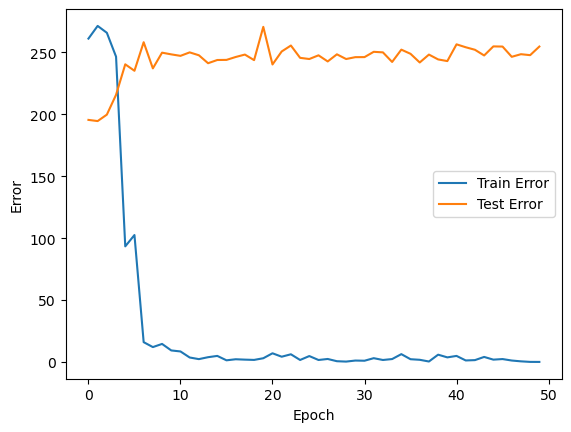

In [23]:
def plot_errors(train_errors, test_errors):
  plt.plot(train_errors, label='Train Error')
  plt.plot(test_errors, label='Test Error')
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.show()

train_errors = train_losses
test_errors = test_losses
plot_errors(train_errors, test_errors)